In [3]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
%cd /content/gdrive/My\ Drive/Python_for_Data_Science_and_Machine_Learning/Machine_Learning/Decision_Tree_and_Random_Forest

/content/gdrive/My Drive/Python_for_Data_Science_and_Machine_Learning/Machine_Learning/Decision_Tree_and_Random_Forest


In [6]:
df = pd.read_csv('kyphosis.csv')

In [7]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


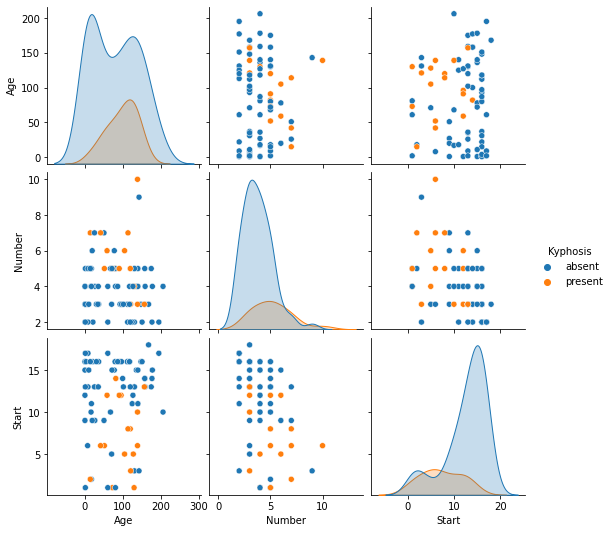

In [9]:
sns.pairplot(df, hue='Kyphosis')

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
predicitons = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, predicitons), '\n')
print(classification_report(y_test, predicitons))

[[17  2]
 [ 5  1]] 

              precision    recall  f1-score   support

      absent       0.77      0.89      0.83        19
     present       0.33      0.17      0.22         6

    accuracy                           0.72        25
   macro avg       0.55      0.53      0.53        25
weighted avg       0.67      0.72      0.68        25



In [22]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=200)

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [26]:
rfc_pred = rfc.predict(X_test)

In [28]:
print(confusion_matrix(y_test, rfc_pred), '\n')
print(classification_report(y_test, rfc_pred))

[[18  1]
 [ 5  1]] 

              precision    recall  f1-score   support

      absent       0.78      0.95      0.86        19
     present       0.50      0.17      0.25         6

    accuracy                           0.76        25
   macro avg       0.64      0.56      0.55        25
weighted avg       0.71      0.76      0.71        25



0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [32]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

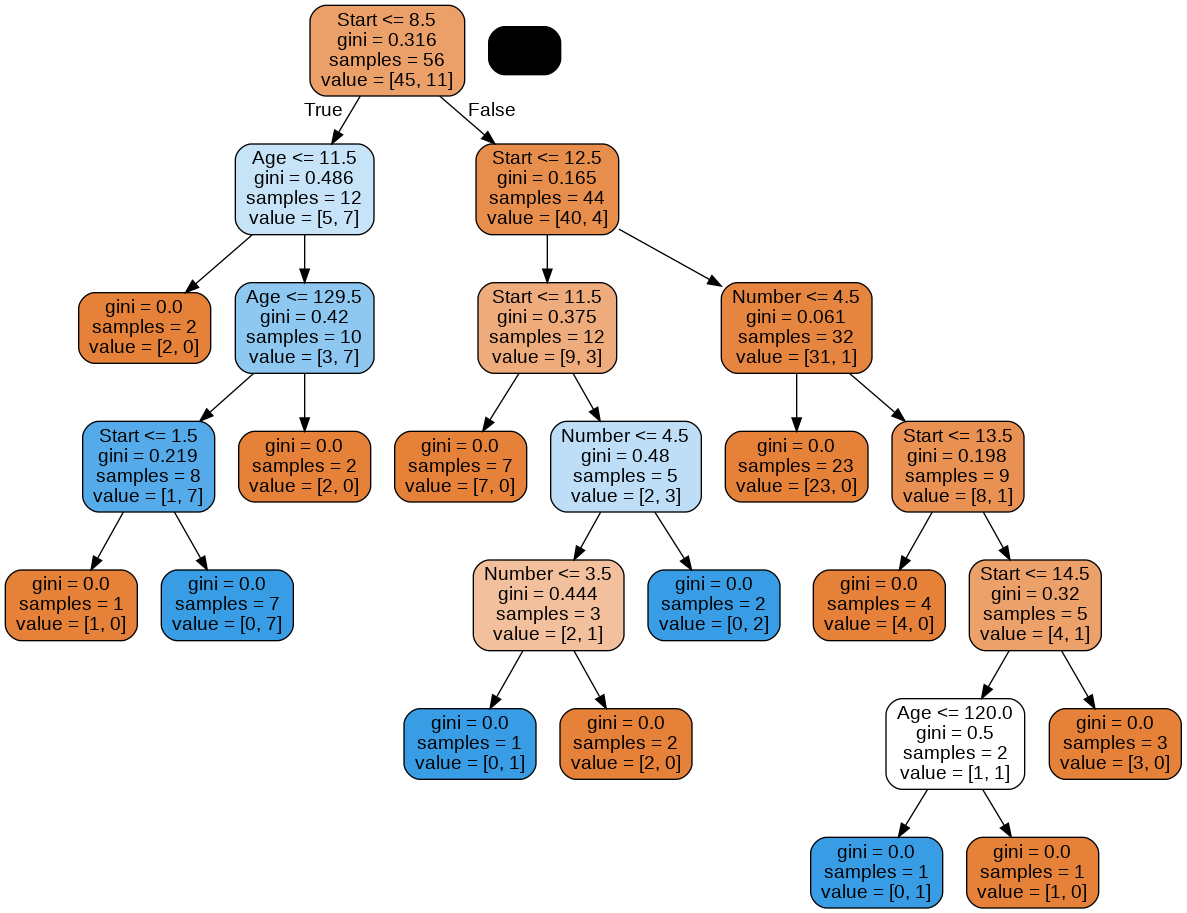

In [35]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())